In [1]:
import numpy as np
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import bernoulli
from scipy.stats import pareto
from statistics import NormalDist
import networkx as nx
import matplotlib.pyplot as plt
import random
import scipy.io
import collections
import pickle
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes,InsetPosition,mark_inset)
import copy
import math

## Four Regions in FC Case

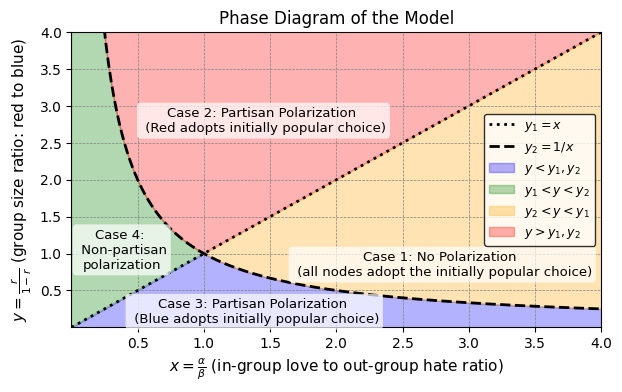

In [2]:
# Define the functions
def y1(x):
    return x

def y2(x):
    return 1/x

def max_y1y2(x):
    return [max(i,1/i) for i in x]

def min_y1y2(x):
    return [min(i,1/i) for i in x]

y_min = 0.0001
y_max = 4

# Generate x values in the range 0 <= x < 5
x_values = np.linspace(y_min, y_max, 400)  # Start from 0.01 to avoid division by zero in y2

# Generate y values for y1 and y2
y1_values = y1(x_values)
y2_values = y2(x_values)

plt.figure(figsize=(6.3, 4))

# Plot the curves y1 = x and y2 = 1/x
plt.plot(x_values, y1_values, label=r'$y_1 = x$', linestyle = ':', linewidth=2, color='k')
plt.plot(x_values, y2_values, label=r'$y_2 = 1/x$', linestyle = '--', linewidth=2, color='k')

# Fill the quadrants with different colors
plt.fill_between(x_values, 0, min_y1y2(x_values), interpolate=True, color='blue', alpha=0.3, label=r'$y < y_1, y_2$')
plt.fill_between(x_values, y1_values, y2_values, where=((y1_values < y2_values)), interpolate=True, color='green', alpha=0.3, label=r'$y_1<y < y_2$')
plt.fill_between(x_values, y1_values, y2_values, where=((y1_values > y2_values)), interpolate=True, color='orange', alpha=0.3, label=r'$y_2<y < y_1$')
plt.fill_between(x_values, y_max, max_y1y2(x_values), interpolate=True, color='red', alpha=0.3, label=r'$y > y_1, y_2$')


# Add labels and legend
plt.xlabel(r'$x = \frac{\alpha}{\beta}$ (in-group love to out-group hate ratio)',fontsize = 11)
plt.ylabel(r'$y = \frac{r}{1-r}$ (group size ratio: red to blue)',fontsize = 11)

plt.ylim(y_min,y_max)
plt.xlim(y_min,y_max)

# plt.xscale('log')
# plt.yscale('log')

# plt.axhline(1, color='grey', linewidth=0.5)
# plt.axvline(1, color='grey', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()

plt.text(1.45, 2.8, 'Case 2: Partisan Polarization \n (Red adopts initially popular choice)', ha='center', va='center', fontsize=9.5, color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7))
plt.text(1.38, 0.21, 'Case 3: Partisan Polarization \n (Blue adopts initially popular choice)', ha='center', va='center', fontsize=9.5, color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7))
plt.text(2.8, 0.85, 'Case 1: No Polarization \n (all nodes adopt the initially popular choice)', ha='center', va='center', fontsize=9.5, color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7))
plt.text(0.38, 1.05, 'Case 4: \n Non-partisan\npolarization', ha='center', va='center', fontsize=9.5, color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7))


plt.title('Phase Diagram of the Model',fontsize = 12)

# Show the plot
plt.tight_layout(pad=1)          
plt.legend(loc='center right', fontsize = 9, edgecolor = 'inherit', ncol = 1)        
plt.savefig('FC_FourRegions' + '.pdf', bbox_inches='tight') 

## Four Regions in SBM Case

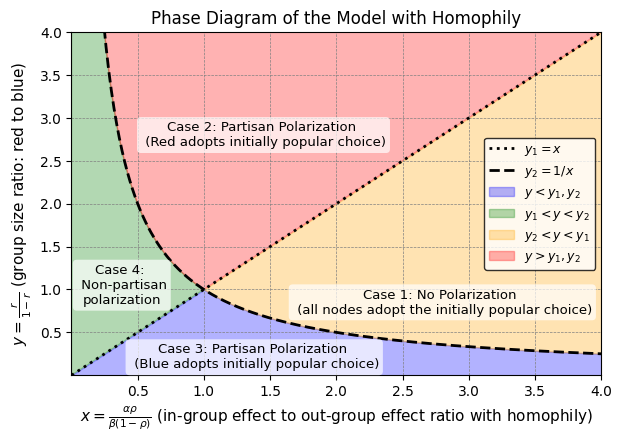

In [3]:
# Define the functions
def y1(x):
    return x

def y2(x):
    return 1/x

def max_y1y2(x):
    return [max(i,1/i) for i in x]

def min_y1y2(x):
    return [min(i,1/i) for i in x]

y_min = 0.0001
y_max = 4

# Generate x values in the range 0 <= x < 5
x_values = np.linspace(y_min, y_max, 400)  # Start from 0.01 to avoid division by zero in y2

# Generate y values for y1 and y2
y1_values = y1(x_values)
y2_values = y2(x_values)

plt.figure(figsize=(6.3, 4.5))

# Plot the curves y1 = x and y2 = 1/x
plt.plot(x_values, y1_values, label=r'$y_1 = x$', linestyle = ':', linewidth=2, color='k')
plt.plot(x_values, y2_values, label=r'$y_2 = 1/x$', linestyle = '--', linewidth=2, color='k')

# Fill the quadrants with different colors
plt.fill_between(x_values, 0, min_y1y2(x_values), interpolate=True, color='blue', alpha=0.3, label=r'$y < y_1, y_2$')
plt.fill_between(x_values, y1_values, y2_values, where=((y1_values < y2_values)), interpolate=True, color='green', alpha=0.3, label=r'$y_1<y < y_2$')
plt.fill_between(x_values, y1_values, y2_values, where=((y1_values > y2_values)), interpolate=True, color='orange', alpha=0.3, label=r'$y_2<y < y_1$')
plt.fill_between(x_values, y_max, max_y1y2(x_values), interpolate=True, color='red', alpha=0.3, label=r'$y > y_1, y_2$')


# Add labels and legend
plt.xlabel(r'$x = \frac{\alpha\rho}{\beta(1-\rho)}$ (in-group effect to out-group effect ratio with homophily)',fontsize = 11)
plt.ylabel(r'$y = \frac{r}{1-r}$ (group size ratio: red to blue)',fontsize = 11)

plt.ylim(y_min,y_max)
plt.xlim(y_min,y_max)

# plt.xscale('log')
# plt.yscale('log')

# plt.axhline(1, color='grey', linewidth=0.5)
# plt.axvline(1, color='grey', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()

plt.text(1.45, 2.8, 'Case 2: Partisan Polarization \n (Red adopts initially popular choice)', ha='center', va='center', fontsize=9.5, color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7))
plt.text(1.38, 0.21, 'Case 3: Partisan Polarization \n (Blue adopts initially popular choice)', ha='center', va='center', fontsize=9.5, color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7))
plt.text(2.8, 0.85, 'Case 1: No Polarization \n (all nodes adopt the initially popular choice)', ha='center', va='center', fontsize=9.5, color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7))
plt.text(0.38, 1.05, 'Case 4: \n Non-partisan\npolarization', ha='center', va='center', fontsize=9.5, color='black', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3', alpha=0.7))


plt.title('Phase Diagram of the Model with Homophily',fontsize = 12)

# Show the plot
plt.tight_layout(pad=1)          
plt.legend(loc='center right', fontsize = 9, edgecolor = 'inherit', ncol = 1)        
plt.savefig('SBM_FourRegions' + '.pdf', bbox_inches='tight') 

# Plots for SBM case

In [4]:
# Define the system of differential equations
def AP_model_SBM_Graph(theta_t_b,theta_t_r, t, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n):
    b_in_link_prob = (1-R)*Rho_b
    b_out_link_prob = R*(1-Rho_b)
    
    mu_b = np.array([b_in_link_prob*theta_t_b, b_in_link_prob*(1-theta_t_b), b_out_link_prob*theta_t_r, b_out_link_prob*(1-theta_t_r)]).reshape(4,1)
    Sigma_b = np.zeros((4,4))
    for i in [0,1,2,3]:
        Sigma_b[i,i] = mu_b[i,0]*(1-mu_b[i,0])/n

    r_in_link_prob = R*Rho_r
    r_out_link_prob = (1-R)*(1-Rho_r)                         
        
    mu_r = np.array([r_in_link_prob*theta_t_r, r_in_link_prob*(1-theta_t_r), r_out_link_prob*theta_t_b, r_out_link_prob*(1-theta_t_b)]).reshape(4,1)
    Sigma_r = np.zeros((4,4))
    for i in [0,1,2,3]:
        Sigma_r[i,i] = mu_r[i,0]*(1-mu_r[i,0])/n
                                        
                    
    coeffs_blue = np.array([Alpha_b, -Alpha_b, -Beta_b, Beta_b]).reshape(4,1)
    coeffs_red = np.array([Alpha_r, -Alpha_r, -Beta_r, Beta_r]).reshape(4,1)    
                    
    p_b_01 = 1-NormalDist(mu=np.matmul(coeffs_blue.transpose(),mu_b)-Inertia_b, sigma=np.sqrt(np.matmul(np.matmul(coeffs_blue.transpose(),Sigma_b),coeffs_blue))).cdf(0)
    p_b_10 = NormalDist(mu=np.matmul(coeffs_blue.transpose(),mu_b)+Inertia_b, sigma=np.sqrt(np.matmul(np.matmul(coeffs_blue.transpose(),Sigma_b),coeffs_blue))).cdf(0)                          
        
    p_r_01 = 1-NormalDist(mu=np.matmul(coeffs_red.transpose(),mu_r)-Inertia_r, sigma=np.sqrt(np.matmul(np.matmul(coeffs_red.transpose(),Sigma_r),coeffs_red))).cdf(0)
    p_r_10 = NormalDist(mu=np.matmul(coeffs_red.transpose(),mu_r)+Inertia_r, sigma=np.sqrt(np.matmul(np.matmul(coeffs_red.transpose(),Sigma_r),coeffs_red))).cdf(0)  
                        
    theta_t_blue_dot = (1-theta_t_b)*p_b_01 - theta_t_b*p_b_10
    theta_t_red_dot = (1-theta_t_r)*p_r_01 - theta_t_r*p_r_10                        
                                                
    return [theta_t_blue_dot, theta_t_red_dot]                   

In [5]:
def Simulate_AP_model_SBM_Graph(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Intertia_b, Alpha_r, Beta_r, Rho_r, Intertia_r, R, n = 5000000, T = 10, delta = 0.001):
    
    theta_t_blue = [Initial_H1_prob_blue]
    theta_t_red = [Initial_H1_prob_red]

    T = 10
    time = np.arange(0,T,delta)
    for t in time[:-1]:
        (theta_t_blue_dot, theta_t_red_dot) = AP_model_SBM_Graph(theta_t_blue[-1],theta_t_red[-1], t, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n)
        theta_t_blue.append(theta_t_blue[-1] + delta*theta_t_blue_dot)
        theta_t_red.append(theta_t_red[-1] + delta*theta_t_red_dot)
    
    return time, theta_t_blue, theta_t_red

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def dynamical_system_gradient(x, y, Alpha,Beta,R, Rho):
    Alpha_b = Alpha
    Beta_b = Beta
    Rho_b = Rho

    Alpha_r = Alpha
    Beta_r = Beta
    Rho_r = Rho
    
    # Initialize arrays to store gradient values
    dx_dt_grid = np.zeros_like(x)
    dy_dt_grid = np.zeros_like(y)
    
    # Iterate over each point in the grid
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            # Compute the gradient at each point on the grid
            dx_dt, dy_dt = AP_model_SBM_Graph(x[i, j], y[i, j], 1, Alpha_b, Beta_b, Rho_b, 0, Alpha_r, Beta_r, Rho_r, 0, R, 5E10)
            # Store the gradient values
            dx_dt_grid[i, j] = dx_dt
            dy_dt_grid[i, j] = dy_dt
    
    return dx_dt_grid, dy_dt_grid

# Create a function to generate the phase plot
def create_phase_plot(Initial_H1_prob_blue,  Initial_H1_prob_red, Alpha,Beta,R, Rho=0.5, theoretical = 0):
    
    def y1_function(x, alpha, beta, r, rho):
        return (rho*alpha*(1-r)/((1-rho)*beta*r)) * x - rho*alpha*(1-r)/(2*(1-rho)*beta*r) + 0.5

    def y2_function(x, alpha, beta, r, rho):
        return ((1-rho)*beta*(1-r)/(rho*alpha*r)) * x - (1-rho)*beta*(1-r)/(2*rho*alpha*r) + 0.5
    
    Alpha_b = Alpha
    Beta_b = Beta
    Rho_b = Rho

    Alpha_r = Alpha
    Beta_r = Beta
    Rho_r = Rho
    
    # Define the range of x and y values
    
    n_grid = 20
    scale = 15
    
    x_values = np.linspace(0, 1, n_grid)
    y_values = np.linspace(0, 1, n_grid)
    
    # Create a grid of x and y values
    x_grid, y_grid = np.meshgrid(x_values, y_values)
    
    # Compute the gradient at each point on the grid
    dx_dt_grid, dy_dt_grid = dynamical_system_gradient(x_grid, y_grid,Alpha,Beta,R,Rho)
    
    # Normalize the gradients for better visualization
    magnitude = np.sqrt(dx_dt_grid ** 2 + dy_dt_grid ** 2)
    dx_dt_grid /= magnitude
    dy_dt_grid /= magnitude
    
    # Plot the phase plot
    # plt.figure(figsize=(8, 6))
    plt.quiver(x_grid, y_grid, dx_dt_grid, dy_dt_grid, scale=scale)

    # Define x values
    x_values = np.linspace(0, 1, 100)

    # Calculate y values
    y1_values = y1_function(x_values, Alpha, Beta, R, Rho)
    y2_values = y2_function(x_values, Alpha, Beta, R, Rho)

    y_0 = np.ones(100)
    y_1 = np.ones(100)

    # Plot
    plt.fill_between(x_values, y1_values, 0, color='blue', alpha=0.3)
    plt.fill_between(x_values, y2_values, 1, color='red', alpha=0.3)

    plt.plot(x_values, y1_values, label='y1', color='tab:blue')
    plt.plot(x_values, y2_values, label='y2', color='tab:red')
    
    # plt.plot(x_values, x_values, color='green', linestyle='--', label='y=x')    
    plt.plot(x_values, x_values, color='dimgrey', linestyle='--', label='y=x')        
    
    
    #Plotting the trajectory
    theta_t_blue = [Initial_H1_prob_blue]
    theta_t_red = [Initial_H1_prob_red]
    T = 10
    delta = 0.001
    time = np.arange(0,T,delta)
    for t in time[:-1]:
        (theta_t_blue_dot, theta_t_red_dot) = AP_model_SBM_Graph(theta_t_blue[-1],theta_t_red[-1], t, Alpha_b, Beta_b, Rho_b, 0, Alpha_r, Beta_r, Rho_r, 0, R, 5E10)
        theta_t_blue.append(theta_t_blue[-1] + delta*theta_t_blue_dot)
        theta_t_red.append(theta_t_red[-1] + delta*theta_t_red_dot)
    
    # arrow_interval = 150
    # for i in range(0, len(theta_t_blue)-1, arrow_interval):
    #     plt.arrow(theta_t_blue[i], theta_t_red[i], theta_t_blue[i+1]-theta_t_blue[i], theta_t_red[i+1]-theta_t_red[i], 
    #               shape='full', lw=1,length_includes_head=True, head_width=0.03, color='gold', fill=True)     
    # plt.plot(theta_t_blue, theta_t_red, color='yellow', linestyle = '--', linewidth = 1)   
    
    if theoretical == 1:
        if Beta/Alpha > (R/(1-R)) and Alpha/Beta < (R/(1-R)):
            if Initial_H1_prob_blue > 0.5:                                              
                theta_t_blue = [x for x in theta_t_blue if x > 0.5]
                theta_t_red = [x for x in theta_t_red if x > 0.5]
            if Initial_H1_prob_blue < 0.5:                                              
                theta_t_blue = [x for x in theta_t_blue if x < 0.5]
                theta_t_red = [x for x in theta_t_red if x < 0.5]  
    
    arrow_interval = 150
    for i in range(0, len(theta_t_blue)-1, arrow_interval):
        plt.arrow(theta_t_blue[i], theta_t_red[i], theta_t_blue[i+1]-theta_t_blue[i], theta_t_red[i+1]-theta_t_red[i], 
                  shape='full', lw=1,length_includes_head=True, head_width=0.05, color='purple', fill=True)     
    plt.plot(theta_t_blue, theta_t_red, color='purple', linestyle = '--', linewidth = 1)      
    
    plt.xticks([0.00, 0.25, 0.50, 0.75, 1.00])
    plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00])    
    
    plt.xlabel(r'$\theta_{t}^{(\mathcal{B})}$', fontsize=15)
    plt.ylabel(r'$\theta_{t}^{\mathcal{R}}$', fontsize=15)    
    # plt.title('Phase Plot of the Dynamical System')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    # plt.show()

In [7]:
def SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Intertia_b, Alpha_r, Beta_r, Rho_r, Intertia_r, R, n = 5000000, T = 10, delta = 0.001):
    time, theta_blue, theta_red = Simulate_AP_model_SBM_Graph(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Intertia_b, Alpha_r, Beta_r, Rho_r, Intertia_r, R, n = 5000000, T = 10, delta = delta)
    plt.plot(time, theta_blue, label=r'$\theta^{\mathcal{B}}(t)$',c='blue',linestyle = '-.',linewidth=2)
    plt.plot(time, theta_red, label=r'$\theta^{\mathcal{R}}(t)$', c='red', linestyle = ':',linewidth=2.25)
    plt.xlabel(r'Time $t$', fontsize=15)    
    plt.ylabel(r'$\theta_t$', fontsize=15)    
    plt.legend()

In [8]:
def parameter_location(Alpha,Beta, R, Rho):

    # Define the functions
    def y1(x):
        return x

    def y2(x):
        return 1/x

    def max_y1y2(x):
        return [max(i,1/i) for i in x]

    def min_y1y2(x):
        return [min(i,1/i) for i in x]

    y_min = 0.0001
    y_max = 4

    # Generate x values in the range 0 <= x < 5
    x_values = np.linspace(y_min, y_max, 400)  # Start from 0.01 to avoid division by zero in y2

    # Generate y values for y1 and y2
    y1_values = y1(x_values)
    y2_values = y2(x_values)

    # Plot the curves y1 = x and y2 = 1/x
    plt.plot(x_values, y1_values, label=r'$y_1 = x$', linestyle = ':', linewidth=2, color='k')
    plt.plot(x_values, y2_values, label=r'$y_2 = 1/x$', linestyle = '--', linewidth=2, color='k')

    # Fill the quadrants with different colors
    plt.fill_between(x_values, 0, min_y1y2(x_values), interpolate=True, color='blue', alpha=0.3, label=r'$y < y_1, y_2$')
    plt.fill_between(x_values, y1_values, y2_values, where=((y1_values < y2_values)), interpolate=True, color='green', alpha=0.3, label=r'$y_1<y < y_2$')
    plt.fill_between(x_values, y1_values, y2_values, where=((y1_values > y2_values)), interpolate=True, color='orange', alpha=0.3, label=r'$y_2<y < y_1$')
    plt.fill_between(x_values, y_max, max_y1y2(x_values), interpolate=True, color='red', alpha=0.3, label=r'$y > y_1, y_2$')


    # Add labels and legend
    plt.xlabel(r'${\alpha}/{\beta}$',fontsize = 12)
    plt.ylabel(r'${r}/{(1-r)}$',fontsize = 12)

    plt.ylim(y_min,y_max)
    plt.xlim(y_min,y_max)

    plt.xticks([0, 1, 2, 3, 4])
    plt.yticks([0, 1, 2, 3, 4])    

    # plt.axhline(1, color='grey', linewidth=0.5)
    # plt.axvline(1, color='grey', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    # plt.legend()

    plt.plot(Alpha*Rho/(Beta*(1-Rho)), R/(1-R), 'r*', markersize=10)
    
    # # Show the plot
    # plt.tight_layout(pad=1)          
    # plt.legend(loc='center right', fontsize = 11, edgecolor = 'inherit', ncol = 1)        
    # plt.savefig('FC_FourRegions' + '.pdf', bbox_inches='tight') 

/tmp/ipykernel_1051/2608695319.py:62: RuntimeWarning: invalid value encountered in divide
  dx_dt_grid /= magnitude
/tmp/ipykernel_1051/2608695319.py:63: RuntimeWarning: invalid value encountered in divide
  dy_dt_grid /= magnitude


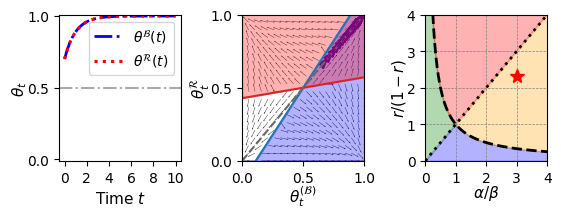

In [534]:
fig, axs = plt.subplots(1, 3, figsize=(6.3, 1.9))

FS = 11
row_label_scale = 0.36
####################### Case 1 #######################
x = 0
y = 0

# Set initial conditions
Initial_H1_prob_blue = 0.7
Initial_H1_prob_red = 0.7

# Set parameters
R = 0.7
Alpha = 0.75
Beta = 0.25

Rho = 0.5
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[y])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)

# Plot the phaseplot
plt.sca(axs[y+1])
create_phase_plot(Initial_H1_prob_blue,  Initial_H1_prob_red, Alpha, Beta, R, Rho)

# Plot the phaseplot
plt.sca(axs[y+2])
parameter_location(Alpha, Beta, R, Rho)

for y in [0]:
    axs[y].set_xlabel(r'Time $t$', fontsize=FS)    
    axs[y].set_ylabel(r'$\theta_t$', fontsize=FS,labelpad=-1)
    axs[y].set_ylim(-0.01,1.01)
    axs[y].set_xticks(np.arange(0,11,2))  
    axs[y].axhline(y=0.5, color='darkgrey', linestyle='-.')
    axs[y].set_xticks([0, 2, 4, 6, 8, 10])   
    axs[y].set_yticks([0.00, 0.50, 1.00])        



for y in [1]:
    axs[y].set_xlabel(r'$\theta_{t}^{(\mathcal{B})}$',fontsize = FS,labelpad=-1)
    axs[y].set_ylabel(r'$\theta_{t}^{\mathcal{R}}$',fontsize = FS, labelpad=-2)
    axs[y].set_ylim(-0.0,1.0)
    axs[y].set_title(axs[y].get_title(), pad=10)
    axs[y].title.set_fontsize(FS)
    axs[y].set_xticks([0.00, 0.50, 1.00])
    axs[y].set_yticks([0.00, 0.50,1.00])


for y in [2]:
    axs[y].set_xlabel(r'$\alpha/\beta$',fontsize = FS,labelpad=-1)
    axs[y].set_ylabel(r'$r/(1-r)$',fontsize = FS, labelpad=-1)
    axs[y].set_ylim(-0.0,1.0)
    axs[y].set_xticks([0,1,2,3,4])
    axs[y].set_yticks([0,1,2,3,4])
    
plt.subplots_adjust(wspace=0.5)  


/tmp/ipykernel_1051/2608695319.py:62: RuntimeWarning: invalid value encountered in divide
  dx_dt_grid /= magnitude
/tmp/ipykernel_1051/2608695319.py:63: RuntimeWarning: invalid value encountered in divide
  dy_dt_grid /= magnitude


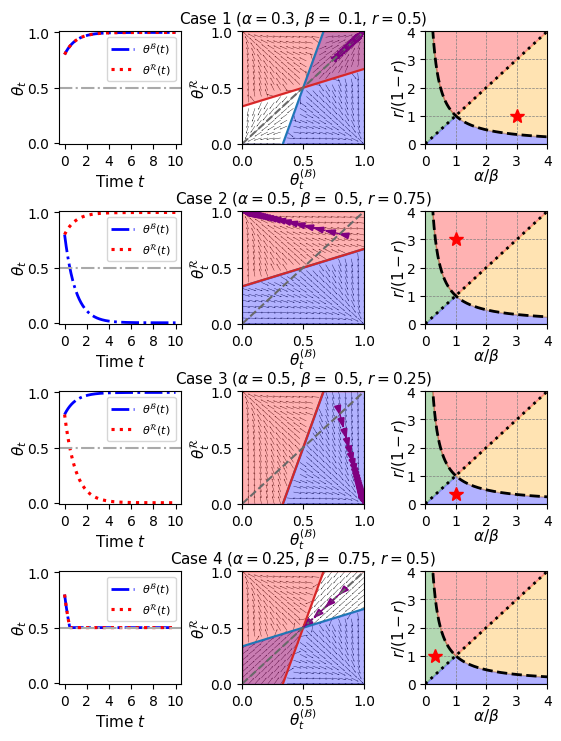

In [535]:
fig, axs = plt.subplots(4, 3, figsize=(6.3, 7.5))

FS = 11
row_label_scale = 0.36
####################### Case 1 #######################
x = 0
y = 0

# Set initial conditions
Initial_H1_prob_blue = 0.8
Initial_H1_prob_red = 0.8
# Set parameters
R = 0.5
Alpha = 0.3
Beta = 0.1

Rho = 0.5
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[x,y])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)

# Plot the phaseplot
plt.sca(axs[x,y+1])
create_phase_plot(Initial_H1_prob_blue,  Initial_H1_prob_red, Alpha, Beta, R, Rho)
axs[x,y+1].set_title('Case 1 ('r'$\alpha = $' + str(Alpha) + r', $\beta = $ ' + str(Beta) + r', $r = $' + str(R) + ')', fontsize=FS, ha='center')

# Plot the phaseplot
plt.sca(axs[x,y+2])
parameter_location(Alpha, Beta, R, Rho)

###################################################################################################################

####################### Case 2 #######################
x = 1
y = 0

# Set initial conditions
Initial_H1_prob_blue = 0.8
Initial_H1_prob_red = 0.8
# Set parameters
R = 0.75
Alpha = 0.5
Beta = 0.5

Rho = 0.5
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[x,y])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)

# Plot the phaseplot
plt.sca(axs[x,y+1])
create_phase_plot(Initial_H1_prob_blue,  Initial_H1_prob_red, Alpha, Beta, R, Rho)
axs[x,y+1].set_title('Case 2 ('r'$\alpha = $' + str(Alpha) + r', $\beta = $ ' + str(Beta) + r', $r = $' + str(R) + ')', fontsize=FS, ha='center')

# Plot the phaseplot
plt.sca(axs[x,y+2])
parameter_location(Alpha, Beta, R, Rho)
###################################################################################################################


####################### Case 3 #######################
x = 2
y = 0

# Set initial conditions
Initial_H1_prob_blue = 0.8
Initial_H1_prob_red = 0.8
# Set parameters
R = 0.25
Alpha = 0.5
Beta = 0.5

Rho = 0.5
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[x,y])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)

# Plot the phaseplot
plt.sca(axs[x,y+1])
create_phase_plot(Initial_H1_prob_blue,  Initial_H1_prob_red, Alpha, Beta, R, Rho)
axs[x,y+1].set_title('Case 3 ('r'$\alpha = $' + str(Alpha) + r', $\beta = $ ' + str(Beta) + r', $r = $' + str(R) + ')', fontsize=FS, ha='center')

# Plot the phaseplot
plt.sca(axs[x,y+2])
parameter_location(Alpha, Beta, R, Rho)
###################################################################################################################

####################### Case 4 #######################
x = 3
y = 0

# Set initial conditions
Initial_H1_prob_blue = 0.8
Initial_H1_prob_red = 0.8
# Set parameters
R = 0.5
Alpha = 0.25
Beta = 0.75

Rho = 0.5
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[x,y])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)

# Plot the phaseplot
plt.sca(axs[x,y+1])
create_phase_plot(Initial_H1_prob_blue,  Initial_H1_prob_red, Alpha, Beta, R, Rho, theoretical = 1)
axs[x,y+1].set_title('Case 4 ('r'$\alpha = $' + str(Alpha) + r', $\beta = $ ' + str(Beta) + r', $r = $' + str(R) + ')', fontsize=FS, ha='center')

# Plot the phaseplot
plt.sca(axs[x,y+2])
parameter_location(Alpha, Beta, R, Rho)
###################################################################################################################

for x in [0,1,2,3]:
    for y in [0]:
        axs[x,y].set_xlabel(r'Time $t$', fontsize=FS)    
        axs[x,y].set_ylabel(r'$\theta_t$', fontsize=FS,labelpad=-1)
        axs[x,y].set_ylim(-0.01,1.01)
        axs[x,y].legend(loc = 'best',fontsize = FS-3, ncols = 1)
        axs[x,y].set_xticks(np.arange(0,11,2))  
        axs[x,y].axhline(y=0.5, color='darkgrey', linestyle='-.')
        axs[x,y].title.set_fontsize(FS-1)
        axs[x,y].set_xticks([0, 2, 4, 6, 8, 10])   
        axs[x,y].set_yticks([0.00, 0.50, 1.00])        


for x in [0,1,2,3]:
    for y in [1]:
        axs[x,y].set_xlabel(r'$\theta_{t}^{(\mathcal{B})}$',fontsize = FS,labelpad=-1)
        axs[x,y].set_ylabel(r'$\theta_{t}^{\mathcal{R}}$',fontsize = FS, labelpad=-2)
        axs[x,y].set_ylim(-0.0,1.0)
        # axs[x,y].legend(loc = 'best',fontsize = FS-1, ncols = 2)
        # axs[x,y].set_xticks(np.arange(0,11,2))  
        # axs[x,y].axhline(y=0.5, color='y', linestyle='-.')
        axs[x,y].title.set_fontsize(FS)
        axs[x,y].set_xticks([0.00, 0.50, 1.00])
        axs[x,y].set_yticks([0.00, 0.50,1.00])
        
for x in [0,1,2,3]:
    for y in [2]:
        axs[x,y].set_xlabel(r'$\alpha/\beta$',fontsize = FS,labelpad=-1)
        axs[x,y].set_ylabel(r'$r/(1-r)$',fontsize = FS, labelpad=-1)
        axs[x,y].set_ylim(-0.0,1.0)
        # axs[x,y].legend(loc = 'best',fontsize = FS-1, ncols = 2)
        # axs[x,y].set_xticks(np.arange(0,11,2))  
        # axs[x,y].axhline(y=0.5, color='y', linestyle='-.')
        axs[x,y].title.set_fontsize(FS-1)
        axs[x,y].set_xticks([0,1,2,3,4])
        axs[x,y].set_yticks([0,1,2,3,4])
        
# fig.text(0.275, 0.94, 'Trajctory in Time Domain', ha='center', fontsize = FS)
# fig.text(0.725, 0.94, 'Trajctory in State Space', ha='center', fontsize = FS) 

plt.subplots_adjust(bottom = 0.01, wspace=0.5, hspace=0.6)   
plt.savefig('FC_FourPhasePlots' + '.pdf', bbox_inches='tight') 

/tmp/ipykernel_81/2608695319.py:62: RuntimeWarning: invalid value encountered in divide
  dx_dt_grid /= magnitude
/tmp/ipykernel_81/2608695319.py:63: RuntimeWarning: invalid value encountered in divide
  dy_dt_grid /= magnitude


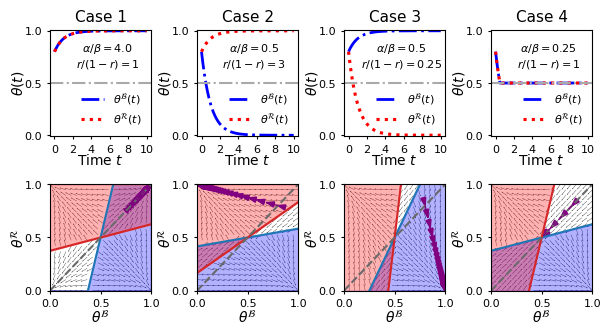

In [13]:
fig, axs = plt.subplots(2, 4, figsize=(7, 3.))

FS = 11
row_label_scale = 0.36
####################### Case 1 #######################
# Set initial conditions
Initial_H1_prob_blue = 0.8
Initial_H1_prob_red = 0.8
# Set parameters
# R = 0.75
R = 0.5
Alpha = 0.8
Beta = 0.2

Rho = 0.5
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[0,0])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)

# Plot the phaseplot
plt.sca(axs[1,0])
create_phase_plot(Initial_H1_prob_blue,  Initial_H1_prob_red, Alpha, Beta, R, Rho)
# axs[0,0].set_title('Case 1 \n ('r'$\alpha = $' + str(Alpha) + r', $\beta = $ ' + str(Beta) + r', $r = $' + str(R) + ')', fontsize=FS-2, ha='center')
axs[0,0].set_title('Case 1', fontsize=FS-6, ha='center')
axs[0,0].text(5.75, 0.8, r'$\alpha/\beta = $' + str(Alpha/Beta), fontsize=FS-3, ha='center')
axs[0,0].text(5.75, 0.65, r'$r/(1-r) = $' + str(math.trunc(R/(1-R))), fontsize=FS-3, ha='center')
###################################################################################################################

####################### Case 2 #######################
# Set initial conditions
Initial_H1_prob_blue = 0.8
Initial_H1_prob_red = 0.8
# Set parameters
R = 0.75
Alpha = 0.3
Beta = 0.6

Rho = 0.5
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[0,1])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)

# Plot the phaseplot
plt.sca(axs[1,1])
create_phase_plot(Initial_H1_prob_blue,  Initial_H1_prob_red, Alpha, Beta, R, Rho)
# axs[0,1].set_title('Case 2 \n ('r'$\alpha = $' + str(Alpha) + r', $\beta = $ ' + str(Beta) + r', $r = $' + str(R) + ')', fontsize=FS-2, ha='center')
axs[0,1].set_title('Case 2', fontsize=FS-6, ha='center')
axs[0,1].text(5.75, 0.8, r'$\alpha/\beta = $' + str(Alpha/Beta), fontsize=FS-3, ha='center')
axs[0,1].text(5.75, 0.65, r'$r/(1-r) = $' + str(math.trunc(R/(1-R))), fontsize=FS-3, ha='center')
###################################################################################################################


####################### Case 3 #######################
# Set initial conditions
Initial_H1_prob_blue = 0.8
Initial_H1_prob_red = 0.8
# Set parameters
R = 0.2
Alpha = 0.3
Beta = 0.6

Rho = 0.5
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[0,2])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)

# Plot the phaseplot
plt.sca(axs[1,2])
create_phase_plot(Initial_H1_prob_blue,  Initial_H1_prob_red, Alpha, Beta, R, Rho)
# axs[0,2].set_title('Case 3 \n ('r'$\alpha = $' + str(Alpha) + r', $\beta = $ ' + str(Beta) + r', $r = $' + str(R) + ')', fontsize=FS-2, ha='center')
axs[0,2].set_title('Case 3', fontsize=FS-6, ha='center')
axs[0,2].text(5.75, 0.8, r'$\alpha/\beta = $' + str(Alpha/Beta), fontsize=FS-3, ha='center')
axs[0,2].text(5.75, 0.65, r'$r/(1-r) = $' + str((R/(1-R))), fontsize=FS-3, ha='center')
###################################################################################################################

####################### Case 4 #######################
# Set initial conditions
Initial_H1_prob_blue = 0.8
Initial_H1_prob_red = 0.8
# Set parameters
R = 0.5
Alpha = 0.2
Beta = 0.8

Rho = 0.5
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[0,3])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)

# Plot the phaseplot
plt.sca(axs[1,3])
create_phase_plot(Initial_H1_prob_blue,  Initial_H1_prob_red, Alpha, Beta, R, Rho, theoretical = 1)
# axs[0,3].set_title('Case 4 \n ('r'$\alpha = $' + str(Alpha) + r', $\beta = $ ' + str(Beta) + r', $r = $' + str(R) + ')', fontsize=FS-2, ha='center')
axs[0,3].set_title('Case 4', fontsize=FS-6, ha='center')
axs[0,3].text(5.75, 0.8, r'$\alpha/\beta = $' + str(Alpha/Beta), fontsize=FS-3, ha='center')
axs[0,3].text(5.75, 0.65, r'$r/(1-r) = $' + str(math.trunc(R/(1-R))), fontsize=FS-3, ha='center')

###################################################################################################################

for x in [0]:
    for y in [0,1,2,3]:
        axs[x,y].set_xlabel(r'Time $t$', fontsize=FS-1,labelpad=-1)
        axs[x,y].set_ylabel(r'$\theta(t)$', fontsize=FS-1,labelpad=-1)
        axs[x,y].set_ylim(-0.01,1.01)
        axs[x,y].legend(loc = 'lower right',fontsize = FS-3, ncols = 1,frameon=False, facecolor='none')
        axs[x,y].set_xticks(np.arange(0,11,2), fontsize = FS-3)  
        axs[x,y].axhline(y=0.5, color='darkgrey', linestyle='-.')
        axs[x,y].title.set_fontsize(FS)
        axs[x,y].set_xticks([0, 2, 4, 6, 8, 10])  
        axs[x,y].set_yticks([0.00, 0.50, 1.00])       
        axs[x,y].tick_params(axis='both', which='major', labelsize=FS-3, length=2)  # Adjust labelsize and length as needed
       

for x in [1]:
    for y in [0,1,2,3]:
        axs[x,y].set_xlabel(r'$\theta^{\mathcal{B}}$',fontsize = FS-1,labelpad=0)
        axs[x,y].set_ylabel(r'$\theta^{\mathcal{R}}$',fontsize = FS-1, labelpad=-2)
        axs[x,y].set_ylim(-0.0,1.0)
        # axs[x,y].legend(loc = 'best',fontsize = FS-1, ncols = 2)
        # axs[x,y].set_xticks(np.arange(0,11,2))  
        # axs[x,y].axhline(y=0.5, color='y', linestyle='-.')
        axs[x,y].title.set_fontsize(FS)
        axs[x,y].set_xticks([0.00, 0.50, 1.00])
        axs[x,y].set_yticks([0.00, 0.50,1.00])
        axs[x,y].tick_params(axis='both', which='major', labelsize=FS-3, length=2)  # Adjust labelsize and length as needed        

        
# fig.text(0.275, 0.94, 'Trajctory in Time Domain', ha='center', fontsize = FS)
# fig.text(0.725, 0.94, 'Trajctory in State Space', ha='center', fontsize = FS) 

plt.subplots_adjust(bottom = 0.01, wspace=0.45, hspace=0.45)   
plt.savefig('FC_FourPhasePlots_1' + '.pdf', bbox_inches='tight') 

/tmp/ipykernel_1051/2608695319.py:62: RuntimeWarning: invalid value encountered in divide
  dx_dt_grid /= magnitude
/tmp/ipykernel_1051/2608695319.py:63: RuntimeWarning: invalid value encountered in divide
  dy_dt_grid /= magnitude


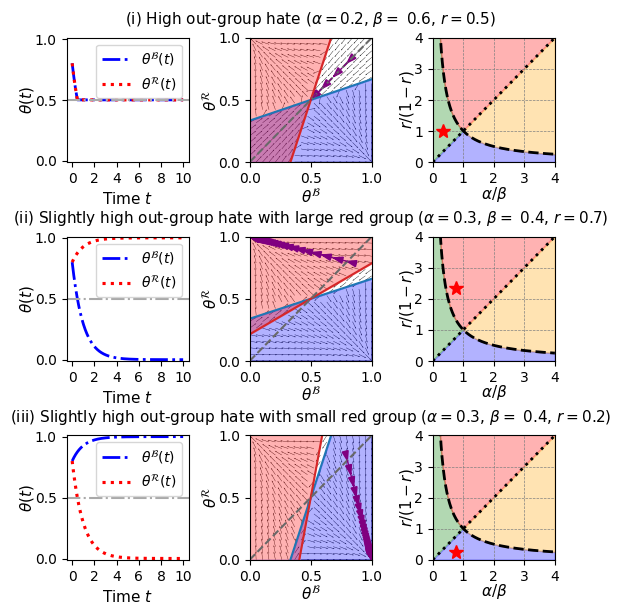

In [548]:
fig, axs = plt.subplots(3, 3, figsize=(6.3, 6.))

FS = 11
row_label_scale = 0.36
####################### Case 1 #######################
x = 0
y = 0

# Set initial conditions
Initial_H1_prob_blue = 0.8
Initial_H1_prob_red = 0.8
# Set parameters
R = 0.5
Alpha = 0.2
Beta = 0.6

Rho = 0.5
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[x,y])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)

# Plot the phaseplot
plt.sca(axs[x,y+1])
create_phase_plot(Initial_H1_prob_blue,  Initial_H1_prob_red, Alpha, Beta, R, Rho, theoretical = 1)
axs[x,y+1].set_title('(i) High out-group hate ('r'$\alpha = $' + str(Alpha) + r', $\beta = $ ' + str(Beta) + r', $r = $' + str(R) + ')', fontsize=FS, ha='center')

# Plot the phaseplot
plt.sca(axs[x,y+2])
parameter_location(Alpha, Beta, R, Rho)

###################################################################################################################

####################### Case 2 #######################
x = 1
y = 0

# Set initial conditions
Initial_H1_prob_blue = 0.8
Initial_H1_prob_red = 0.8
# Set parameters
R = 0.7
Alpha = 0.3
Beta = 0.4

Rho = 0.5
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[x,y])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)

# Plot the phaseplot
plt.sca(axs[x,y+1])
create_phase_plot(Initial_H1_prob_blue,  Initial_H1_prob_red, Alpha, Beta, R, Rho)
axs[x,y+1].set_title('(ii) Slightly high out-group hate with large red group ('r'$\alpha = $' + str(Alpha) + r', $\beta = $ ' + str(Beta) + r', $r = $' + str(R) + ')', fontsize=FS, ha='center')

# Plot the phaseplot
plt.sca(axs[x,y+2])
parameter_location(Alpha, Beta, R, Rho)
###################################################################################################################


####################### Case 3 #######################
x = 2
y = 0

# Set initial conditions
Initial_H1_prob_blue = 0.8
Initial_H1_prob_red = 0.8
# Set parameters
R = 0.2
Alpha = 0.3
Beta = 0.4

Rho = 0.5
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[x,y])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)

# Plot the phaseplot
plt.sca(axs[x,y+1])
create_phase_plot(Initial_H1_prob_blue,  Initial_H1_prob_red, Alpha, Beta, R, Rho)
axs[x,y+1].set_title('(iii) Slightly high out-group hate with small red group ('r'$\alpha = $' + str(Alpha) + r', $\beta = $ ' + str(Beta) + r', $r = $' + str(R) + ')', fontsize=FS, ha='center')


# Plot the phaseplot
plt.sca(axs[x,y+2])
parameter_location(Alpha, Beta, R, Rho)
###################################################################################################################

for x in [0,1,2]:
    for y in [0]:
        axs[x,y].set_xlabel(r'Time $t$', fontsize=FS)    
        axs[x,y].set_ylabel(r'$\theta(t)$', fontsize=FS,labelpad=-1)
        axs[x,y].set_ylim(-0.01,1.01)
        # axs[x,y].legend(loc = 'best',fontsize = FS-1, ncols = 2)
        axs[x,y].set_xticks(np.arange(0,11,2))  
        axs[x,y].axhline(y=0.5, color='darkgrey', linestyle='-.')
        # axs[x,y].title.set_fontsize(FS-1)
        axs[x,y].set_xticks([0, 2, 4, 6, 8, 10])   
        axs[x,y].set_yticks([0.00, 0.50, 1.00])        


for x in [0,1,2]:
    for y in [1]:
        axs[x,y].set_xlabel(r'$\theta^{\mathcal{B}}$',fontsize = FS,labelpad=1)
        axs[x,y].set_ylabel(r'$\theta^{\mathcal{R}}$',fontsize = FS, labelpad=-2)
        axs[x,y].set_ylim(-0.0,1.0)
        # axs[x,y].legend(loc = 'best',fontsize = FS-1, ncols = 2)
        # axs[x,y].set_xticks(np.arange(0,11,2))  
        # axs[x,y].axhline(y=0.5, color='y', linestyle='-.')
        axs[x,y].set_title(axs[x, y].get_title(), pad=10)
        axs[x,y].title.set_fontsize(FS)
        axs[x,y].set_xticks([0.00, 0.50, 1.00])
        axs[x,y].set_yticks([0.00, 0.50,1.00])
        
for x in [0,1,2]:
    for y in [2]:
        axs[x,y].set_xlabel(r'$\alpha/\beta$',fontsize = FS,labelpad=-1)
        axs[x,y].set_ylabel(r'$r/(1-r)$',fontsize = FS, labelpad=-1)
        axs[x,y].set_ylim(-0.0,1.0)
        # axs[x,y].legend(loc = 'best',fontsize = FS-1, ncols = 2)
        # axs[x,y].set_xticks(np.arange(0,11,2))  
        # axs[x,y].axhline(y=0.5, color='y', linestyle='-.')
        # axs[x,y].title.set_fontsize(FS-1)
        axs[x,y].set_xticks([0,1,2,3,4])
        axs[x,y].set_yticks([0,1,2,3,4])
        
# fig.text(0.275, 0.94, 'Trajctory in Time Domain', ha='center', fontsize = FS)
# fig.text(0.725, 0.94, 'Trajctory in State Space', ha='center', fontsize = FS) 

# # Add labels 'a', 'b', 'c' to the rows
# for i, label in enumerate(['(i)', '(ii)', '(iii)']):
#     axs[i, 0].text(-0.7, 0.5, label, transform=axs[i, 0].transAxes,
#                    fontsize=12, fontweight='bold', va='center')

plt.subplots_adjust(bottom = 0.01, wspace=0.5, hspace=0.6)   
plt.savefig('LargeBeta' + '.pdf', bbox_inches='tight') 

/tmp/ipykernel_1051/2608695319.py:62: RuntimeWarning: invalid value encountered in divide
  dx_dt_grid /= magnitude
/tmp/ipykernel_1051/2608695319.py:63: RuntimeWarning: invalid value encountered in divide
  dy_dt_grid /= magnitude


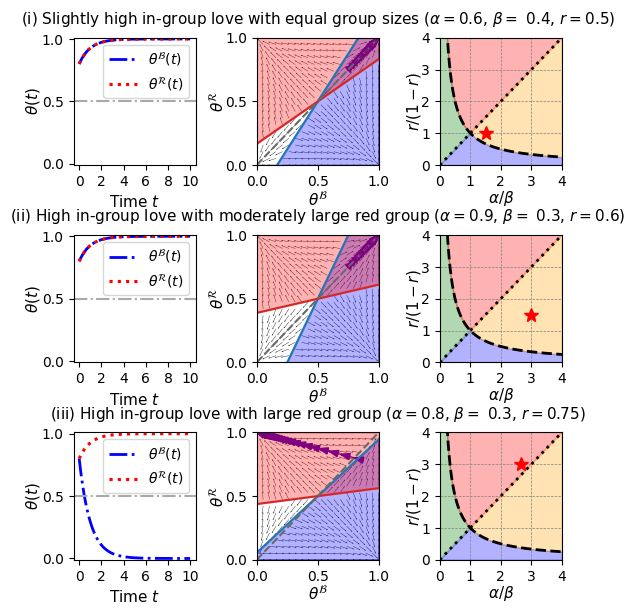

In [538]:
fig, axs = plt.subplots(3, 3, figsize=(6.3, 6.))

FS = 11
row_label_scale = 0.36
####################### Case 1 #######################
x = 0
y = 0

# Set initial conditions
Initial_H1_prob_blue = 0.8
Initial_H1_prob_red = 0.8
# Set parameters
R = 0.5
Alpha = 0.6
Beta = 0.4

Rho = 0.5
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[x,y])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)

# Plot the phaseplot
plt.sca(axs[x,y+1])
create_phase_plot(Initial_H1_prob_blue,  Initial_H1_prob_red, Alpha, Beta, R, Rho)
axs[x,y+1].set_title('(i) Slightly high in-group love with equal group sizes ('r'$\alpha = $' + str(Alpha) + r', $\beta = $ ' + str(Beta) + r', $r = $' + str(R) + ')', fontsize=FS, ha='center')

# Plot the phaseplot
plt.sca(axs[x,y+2])
parameter_location(Alpha, Beta, R, Rho)

###################################################################################################################

####################### Case 2 #######################
x = 1
y = 0

# Set initial conditions
Initial_H1_prob_blue = 0.8
Initial_H1_prob_red = 0.8
# Set parameters
R = 0.6
Alpha = 0.9
Beta = 0.3

Rho = 0.5
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[x,y])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)

# Plot the phaseplot
plt.sca(axs[x,y+1])
create_phase_plot(Initial_H1_prob_blue,  Initial_H1_prob_red, Alpha, Beta, R, Rho)
axs[x,y+1].set_title('(ii) High in-group love with moderately large red group ('r'$\alpha = $' + str(Alpha) + r', $\beta = $ ' + str(Beta) + r', $r = $' + str(R) + ')', fontsize=FS, ha='center')

# Plot the phaseplot
plt.sca(axs[x,y+2])
parameter_location(Alpha, Beta, R, Rho)
###################################################################################################################


####################### Case 3 #######################
x = 2
y = 0

# Set initial conditions
Initial_H1_prob_blue = 0.8
Initial_H1_prob_red = 0.8
# Set parameters
R = 0.75
Alpha = 0.8
Beta = 0.3

Rho = 0.5
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[x,y])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)

# Plot the phaseplot
plt.sca(axs[x,y+1])
create_phase_plot(Initial_H1_prob_blue,  Initial_H1_prob_red, Alpha, Beta, R, Rho)
axs[x,y+1].set_title('(iii) High in-group love with large red group ('r'$\alpha = $' + str(Alpha) + r', $\beta = $ ' + str(Beta) + r', $r = $' + str(R) + ')', fontsize=FS, ha='center')

# Plot the phaseplot
plt.sca(axs[x,y+2])
parameter_location(Alpha, Beta, R, Rho)
###################################################################################################################

for x in [0,1,2]:
    for y in [0]:
        axs[x,y].set_xlabel(r'Time $t$', fontsize=FS)    
        axs[x,y].set_ylabel(r'$\theta(t)$', fontsize=FS,labelpad=-0)
        axs[x,y].set_ylim(-0.01,1.01)
        # axs[x,y].legend(loc = 'best',fontsize = FS-1, ncols = 2)
        axs[x,y].set_xticks(np.arange(0,11,2))  
        axs[x,y].axhline(y=0.5, color='darkgrey', linestyle='-.')
        # axs[x,y].title.set_fontsize(FS-1)
        axs[x,y].set_xticks([0, 2, 4, 6, 8, 10])   
        axs[x,y].set_yticks([0.00, 0.50, 1.00])        


for x in [0,1,2]:
    for y in [1]:
        axs[x,y].set_xlabel(r'$\theta^{\mathcal{B}}$',fontsize = FS,labelpad=1)
        axs[x,y].set_ylabel(r'$\theta^{\mathcal{R}}$',fontsize = FS, labelpad=-2)
        axs[x,y].set_ylim(-0.0,1.0)
        # axs[x,y].legend(loc = 'best',fontsize = FS-1, ncols = 2)
        # axs[x,y].set_xticks(np.arange(0,11,2))  
        # axs[x,y].axhline(y=0.5, color='y', linestyle='-.')
        axs[x,y].set_title(axs[x, y].get_title(), pad=10)
        axs[x,y].title.set_fontsize(FS)
        axs[x,y].set_xticks([0.00, 0.50, 1.00])
        axs[x,y].set_yticks([0.00, 0.50,1.00])
        
for x in [0,1,2]:
    for y in [2]:
        axs[x,y].set_xlabel(r'$\alpha/\beta$',fontsize = FS,labelpad=-0)
        axs[x,y].set_ylabel(r'$r/(1-r)$',fontsize = FS, labelpad=-1)
        axs[x,y].set_ylim(-0.0,1.0)
        # axs[x,y].legend(loc = 'best',fontsize = FS-1, ncols = 2)
        # axs[x,y].set_xticks(np.arange(0,11,2))  
        # axs[x,y].axhline(y=0.5, color='y', linestyle='-.')
        # axs[x,y].title.set_fontsize(FS-1)
        axs[x,y].set_xticks([0,1,2,3,4])
        axs[x,y].set_yticks([0,1,2,3,4])
        
        
# fig.text(0.275, 0.94, 'Trajctory in Time Domain', ha='center', fontsize = FS)
# fig.text(0.725, 0.94, 'Trajctory in State Space', ha='center', fontsize = FS) 

plt.subplots_adjust(bottom = 0.01, wspace=0.5, hspace=0.55)   
plt.savefig('LargeAlpha' + '.pdf', bbox_inches='tight') 

# Effects of Homophily

/tmp/ipykernel_1051/2608695319.py:62: RuntimeWarning: invalid value encountered in divide
  dx_dt_grid /= magnitude
/tmp/ipykernel_1051/2608695319.py:63: RuntimeWarning: invalid value encountered in divide
  dy_dt_grid /= magnitude


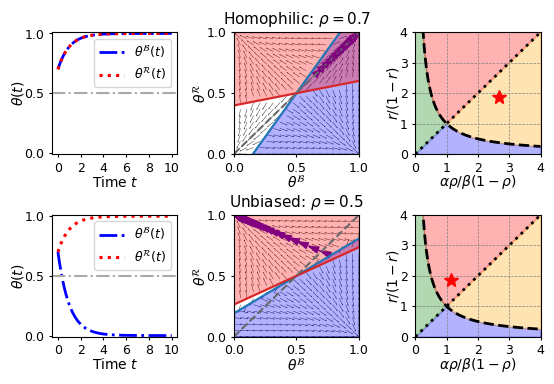

In [539]:
n_rows = 2
fig, axs = plt.subplots(n_rows, 3, figsize=(6.3, 3.5))

FS = 11
row_label_scale = 0.36

##############################################
# Set initial conditions
Initial_H1_prob_blue = 0.7
Initial_H1_prob_red = 0.7
# Set parameters
R = 0.65
Alpha = 0.8
Beta = 0.7

####################### Case 1 #######################
x = 0
y = 0

Rho = 0.7
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[x,y])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)

# Plot the phaseplot
plt.sca(axs[x,y+1])
create_phase_plot(Initial_H1_prob_blue,  Initial_H1_prob_red, Alpha, Beta, R, Rho)
axs[x,y+1].set_title('Homophilic: ' r'$\rho = $' + str(Rho), fontsize=FS, ha='center')

# Plot the phaseplot
plt.sca(axs[x,y+2])
parameter_location(Alpha, Beta, R, Rho)

###################################################################################################################

####################### Case 2 #######################
x = 1
y = 0

Rho = 0.5
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[x,y])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)

# Plot the phaseplot
plt.sca(axs[x,y+1])
create_phase_plot(Initial_H1_prob_blue,  Initial_H1_prob_red, Alpha, Beta, R, Rho)
axs[x,y+1].set_title('Unbiased: ' r'$\rho = $' + str(Rho), fontsize=FS, ha='center')

# Plot the phaseplot
plt.sca(axs[x,y+2])
parameter_location(Alpha, Beta, R, Rho)
###################################################################################################################


for x in np.arange(n_rows):
    for y in [0]:
        axs[x,y].set_xlabel(r'Time $t$', fontsize=FS-1,labelpad=-0.0)    
        axs[x,y].set_ylabel(r'$\theta(t)$', fontsize=FS-1,labelpad=-1)
        axs[x,y].set_ylim(-0.01,1.01)
        axs[x,y].legend(loc = 'best',fontsize = FS-2, ncols = 1)
        axs[x,y].set_xticks(np.arange(0,11,2))  
        axs[x,y].axhline(y=0.5, color='darkgrey', linestyle='-.')
        axs[x,y].title.set_fontsize(FS-1)
        axs[x,y].set_xticks([0, 2, 4, 6, 8, 10])   
        axs[x,y].set_yticks([0.00, 0.50, 1.00])        
        axs[x,y].tick_params(axis='both', which='major', labelsize=FS-2, length=2)  # Adjust labelsize and length as needed           

for x in np.arange(n_rows):
    for y in [1]:
        axs[x,y].set_xlabel(r'$\theta^{\mathcal{B}}$',fontsize = FS-1,labelpad=-0)
        axs[x,y].set_ylabel(r'$\theta^{\mathcal{R}}$',fontsize = FS-1, labelpad=-2)
        axs[x,y].set_ylim(-0.0,1.0)
        # axs[x,y].legend(loc = 'best',fontsize = FS-1, ncols = 2)
        # axs[x,y].set_xticks(np.arange(0,11,2))  
        # axs[x,y].axhline(y=0.5, color='y', linestyle='-.')
        axs[x,y].title.set_fontsize(FS)
        axs[x,y].set_xticks([0.00, 0.50, 1.00])
        axs[x,y].set_yticks([0.00, 0.50,1.00])
        axs[x,y].tick_params(axis='both', which='major', labelsize=FS-2, length=2)  # Adjust labelsize and length as needed           
        
for x in np.arange(n_rows):
    for y in [2]:
        axs[x,y].set_xlabel(r'$\alpha\rho/\beta(1-\rho)$',fontsize = FS-1,labelpad=-1)
        axs[x,y].set_ylabel(r'$r/(1-r)$',fontsize = FS-1, labelpad=-1)
        axs[x,y].set_ylim(-0.0,1.0)
        # axs[x,y].legend(loc = 'best',fontsize = FS-1, ncols = 2)
        # axs[x,y].set_xticks(np.arange(0,11,2))  
        # axs[x,y].axhline(y=0.5, color='y', linestyle='-.')
        axs[x,y].title.set_fontsize(FS-1)
        axs[x,y].set_xticks([0,1,2,3,4])
        axs[x,y].set_yticks([0,1,2,3,4])
        axs[x,y].tick_params(axis='both', which='major', labelsize=FS-2, length=2)  # Adjust labelsize and length as needed           
        
# fig.text(0.275, 0.94, 'Trajctory in Time Domain', ha='center', fontsize = FS)
# fig.text(0.725, 0.94, 'Trajctory in State Space', ha='center', fontsize = FS) 

plt.subplots_adjust(bottom = 0.01, wspace=0.45, hspace=0.5)   
plt.savefig('SBM_IncreasingRho' + '.pdf', bbox_inches='tight') 

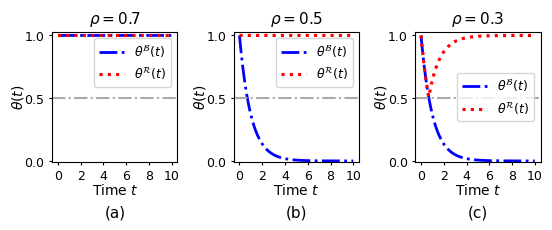

In [540]:
fig, axs = plt.subplots(1, 3, figsize=(6.3, 1.5))

FS = 11
row_label_scale = 0.36

##############################################
# Set initial conditions
Initial_H1_prob_blue = 1
Initial_H1_prob_red = 1
# Set parameters
R = 0.65
Alpha = 0.8
Beta = 0.7
####################### Case 1 #######################
x = 0

Rho = 0.7
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[x])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)
axs[x].set_title(r'$\rho = $' + str(Rho), fontsize=FS)
###################################################################################################################

####################### Case 2 #######################
x = 1

Rho = 0.5
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[x])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)
axs[x].set_title(r'$\rho = $' + str(Rho), fontsize=FS)
###################################################################################################################

####################### Case 3 #######################
x = 2

Rho = 0.3
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[x])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)
axs[x].set_title(r'$\rho = $' + str(Rho), fontsize=FS+1)
###################################################################################################################

for x in [0,1,2]:
    axs[x].set_xlabel(r'Time $t$', fontsize=FS-1,labelpad=-0.0)    
    axs[x].set_ylabel(r'$\theta(t)$', fontsize=FS-1,labelpad=-1)
    axs[x].set_ylim(-0.01,1.03)
    axs[x].legend(loc = 'best',fontsize = FS-2, ncols = 1)
    axs[x].set_xticks(np.arange(0,11,2))  
    axs[x].axhline(y=0.5, color='darkgrey', linestyle='-.')
    axs[x].title.set_fontsize(FS)
    axs[x].set_xticks([0, 2, 4, 6, 8, 10])   
    axs[x].set_yticks([0.00, 0.50, 1.00])        

    axs[x].tick_params(axis='both', which='major', labelsize=FS-2, length=2)  # Adjust labelsize and length as needed           

axs[0].text(0.5, -0.42, '(a)', transform=axs[0].transAxes, ha='center', fontsize=FS+0)
axs[1].text(0.5, -0.42, '(b)', transform=axs[1].transAxes, ha='center', fontsize=FS-0)
axs[2].text(0.5, -0.42, '(c)', transform=axs[2].transAxes, ha='center', fontsize=FS-0)
    
    

plt.subplots_adjust(bottom = 0.01, wspace=0.45, hspace=0.5)   
plt.savefig('SBM_BreakingUnity' + '.pdf', bbox_inches='tight') 

# Party Dependent Initial States

/tmp/ipykernel_1051/2608695319.py:62: RuntimeWarning: invalid value encountered in divide
  dx_dt_grid /= magnitude
/tmp/ipykernel_1051/2608695319.py:63: RuntimeWarning: invalid value encountered in divide
  dy_dt_grid /= magnitude


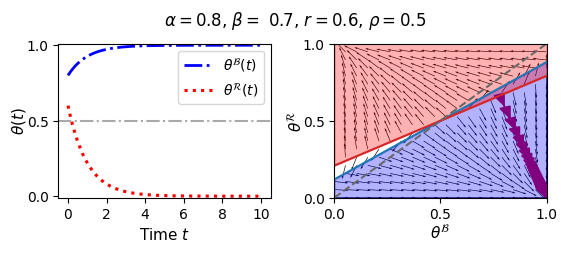

In [551]:
fig, axs = plt.subplots(1, 2, figsize=(6.3, 2))

FS = 11
row_label_scale = 0.36
####################### Case 1 #######################
x = 0
y = 0

# Set initial conditions
Initial_H1_prob_blue = 0.8
Initial_H1_prob_red = 0.6

# Set parameters
R = 0.6
Alpha = 0.8
Beta = 0.7

Rho = 0.5
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[y])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)

# Plot the phaseplot
plt.sca(axs[y+1])
create_phase_plot(Initial_H1_prob_blue,  Initial_H1_prob_red, Alpha, Beta, R, Rho)

for y in [0]:
    axs[y].set_xlabel(r'Time $t$', fontsize=FS)    
    axs[y].set_ylabel(r'$\theta(t)$', fontsize=FS,labelpad=-1)
    axs[y].set_ylim(-0.01,1.01)
    axs[y].set_xticks(np.arange(0,11,2))  
    axs[y].axhline(y=0.5, color='darkgrey', linestyle='-.')
    axs[y].set_xticks([0, 2, 4, 6, 8, 10])   
    axs[y].set_yticks([0.00, 0.50, 1.00])        


for y in [1]:
    axs[y].set_xlabel(r'$\theta^{\mathcal{B}}$',fontsize = FS,labelpad=1.5)
    axs[y].set_ylabel(r'$\theta^{\mathcal{R}}$',fontsize = FS, labelpad=-2)
    axs[y].set_ylim(-0.0,1.0)
    axs[y].set_title(axs[y].get_title(), pad=10)
    axs[y].title.set_fontsize(FS)
    axs[y].set_xticks([0.00, 0.50, 1.00])
    axs[y].set_yticks([0.00, 0.50,1.00])


fig.suptitle(''r'$\alpha = $' + str(Alpha) + r', $\beta = $ ' + str(Beta) + r', $r = $' + str(R) + r', $\rho = $' + str(Rho), fontsize=12, y=1.05)
    
plt.subplots_adjust(wspace=0.3)  
plt.savefig('FC_DifferentInitialStates_majority' + '.pdf', bbox_inches='tight') 

/tmp/ipykernel_1051/2608695319.py:62: RuntimeWarning: invalid value encountered in divide
  dx_dt_grid /= magnitude
/tmp/ipykernel_1051/2608695319.py:63: RuntimeWarning: invalid value encountered in divide
  dy_dt_grid /= magnitude


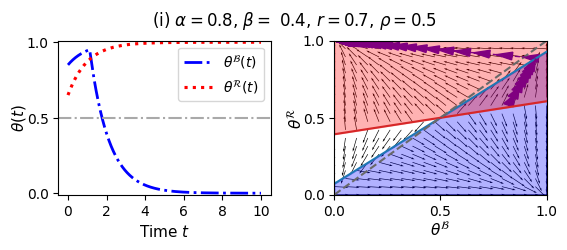

In [552]:
fig, axs = plt.subplots(1, 2, figsize=(6.3, 2))

FS = 11
row_label_scale = 0.36
####################### Case 1 #######################
x = 0
y = 0

# Set initial conditions
Initial_H1_prob_blue = 0.85
Initial_H1_prob_red = 0.65

# Set parameters
R = 0.7
Alpha = 0.8
Beta = 0.4

Rho = 0.5
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[y])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)

# Plot the phaseplot
plt.sca(axs[y+1])
create_phase_plot(Initial_H1_prob_blue,  Initial_H1_prob_red, Alpha, Beta, R, Rho)

for y in [0]:
    axs[y].set_xlabel(r'Time $t$', fontsize=FS)    
    axs[y].set_ylabel(r'$\theta(t)$', fontsize=FS,labelpad=-1)
    axs[y].set_ylim(-0.01,1.01)
    axs[y].set_xticks(np.arange(0,11,2))  
    axs[y].axhline(y=0.5, color='darkgrey', linestyle='-.')
    axs[y].set_xticks([0, 2, 4, 6, 8, 10])   
    axs[y].set_yticks([0.00, 0.50, 1.00])        


for y in [1]:
    axs[y].set_xlabel(r'$\theta^{\mathcal{B}}$',fontsize = FS,labelpad=1.5)
    axs[y].set_ylabel(r'$\theta^{\mathcal{R}}$',fontsize = FS, labelpad=-2)
    axs[y].set_ylim(-0.0,1.0)
    axs[y].set_title(axs[y].get_title(), pad=10)
    axs[y].title.set_fontsize(FS)
    axs[y].set_xticks([0.00, 0.50, 1.00])
    axs[y].set_yticks([0.00, 0.50,1.00])

fig.suptitle('(i) 'r'$\alpha = $' + str(Alpha) + r', $\beta = $ ' + str(Beta) + r', $r = $' + str(R) + r', $\rho = $' + str(Rho), fontsize=12, y=1.035)
    
plt.subplots_adjust(wspace=0.3)  
plt.savefig('FC_DifferentInitialStates_reversal' + '.pdf', bbox_inches='tight') 

/tmp/ipykernel_1051/2608695319.py:62: RuntimeWarning: invalid value encountered in divide
  dx_dt_grid /= magnitude
/tmp/ipykernel_1051/2608695319.py:63: RuntimeWarning: invalid value encountered in divide
  dy_dt_grid /= magnitude


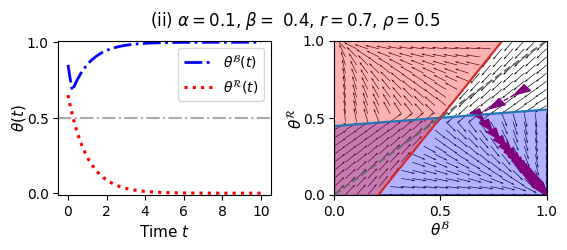

In [553]:
fig, axs = plt.subplots(1, 2, figsize=(6.3, 2))

FS = 11
row_label_scale = 0.36
####################### Case 1 #######################
x = 0
y = 0

# Set initial conditions
Initial_H1_prob_blue = 0.85
Initial_H1_prob_red = 0.65

# Set parameters
R = 0.7
Alpha = 0.1
Beta = 0.4

Rho = 0.5
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[y])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)

# Plot the phaseplot
plt.sca(axs[y+1])
create_phase_plot(Initial_H1_prob_blue,  Initial_H1_prob_red, Alpha, Beta, R, Rho)

for y in [0]:
    axs[y].set_xlabel(r'Time $t$', fontsize=FS)    
    axs[y].set_ylabel(r'$\theta(t)$', fontsize=FS,labelpad=-1)
    axs[y].set_ylim(-0.01,1.01)
    axs[y].set_xticks(np.arange(0,11,2))  
    axs[y].axhline(y=0.5, color='darkgrey', linestyle='-.')
    axs[y].set_xticks([0, 2, 4, 6, 8, 10])   
    axs[y].set_yticks([0.00, 0.50, 1.00])        


for y in [1]:
    axs[y].set_xlabel(r'$\theta^{\mathcal{B}}$',fontsize = FS,labelpad=1.5)
    axs[y].set_ylabel(r'$\theta^{\mathcal{R}}$',fontsize = FS, labelpad=-2)
    axs[y].set_ylim(-0.0,1.0)
    axs[y].set_title(axs[y].get_title(), pad=10)
    axs[y].title.set_fontsize(FS)
    axs[y].set_xticks([0.00, 0.50, 1.00])
    axs[y].set_yticks([0.00, 0.50,1.00])


fig.suptitle('(ii) 'r'$\alpha = $' + str(Alpha) + r', $\beta = $ ' + str(Beta) + r', $r = $' + str(R) + r', $\rho = $' + str(Rho), fontsize=12, y=1.035)
    
plt.subplots_adjust(wspace=0.3)  
plt.savefig('FC_DifferentInitialStates_reversal_2' + '.pdf', bbox_inches='tight') 

/tmp/ipykernel_1051/2608695319.py:62: RuntimeWarning: invalid value encountered in divide
  dx_dt_grid /= magnitude
/tmp/ipykernel_1051/2608695319.py:63: RuntimeWarning: invalid value encountered in divide
  dy_dt_grid /= magnitude


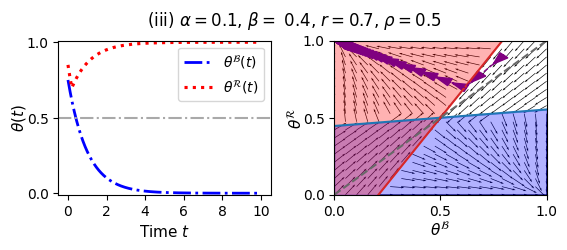

In [554]:
fig, axs = plt.subplots(1, 2, figsize=(6.3, 2))

FS = 11
row_label_scale = 0.36
####################### Case 1 #######################
x = 0
y = 0

# Set initial conditions
Initial_H1_prob_blue = 0.75
Initial_H1_prob_red = 0.85

# Set parameters
R = 0.7
Alpha = 0.1
Beta = 0.4

Rho = 0.5
Inertia = 0.0

Alpha_b = Alpha
Beta_b = Beta
Rho_b = Rho
Inertia_b = Inertia

Alpha_r = Alpha
Beta_r = Beta
Rho_r = Rho
Inertia_r = Inertia


# Plot the time series
plt.sca(axs[y])
SBM_Time_Series(Initial_H1_prob_blue, Initial_H1_prob_red, Alpha_b, Beta_b, Rho_b, Inertia_b, Alpha_r, Beta_r, Rho_r, Inertia_r, R, n = 5000000, T = 10, delta = 0.001)

# Plot the phaseplot
plt.sca(axs[y+1])
create_phase_plot(Initial_H1_prob_blue,  Initial_H1_prob_red, Alpha, Beta, R, Rho)

for y in [0]:
    axs[y].set_xlabel(r'Time $t$', fontsize=FS)    
    axs[y].set_ylabel(r'$\theta(t)$', fontsize=FS,labelpad=-1)
    axs[y].set_ylim(-0.01,1.01)
    axs[y].set_xticks(np.arange(0,11,2))  
    axs[y].axhline(y=0.5, color='darkgrey', linestyle='-.')
    axs[y].set_xticks([0, 2, 4, 6, 8, 10])   
    axs[y].set_yticks([0.00, 0.50, 1.00])        


for y in [1]:
    axs[y].set_xlabel(r'$\theta^{\mathcal{B}}$',fontsize = FS,labelpad=1.5)
    axs[y].set_ylabel(r'$\theta^{\mathcal{R}}$',fontsize = FS, labelpad=-2)
    axs[y].set_ylim(-0.0,1.0)
    axs[y].set_title(axs[y].get_title(), pad=10)
    axs[y].title.set_fontsize(FS)
    axs[y].set_xticks([0.00, 0.50, 1.00])
    axs[y].set_yticks([0.00, 0.50,1.00])


fig.suptitle('(iii) 'r'$\alpha = $' + str(Alpha) + r', $\beta = $ ' + str(Beta) + r', $r = $' + str(R) + r', $\rho = $' + str(Rho), fontsize=12, y=1.035)
    
plt.subplots_adjust(wspace=0.3)  
plt.savefig('FC_DifferentInitialStates_reversal_3' + '.pdf', bbox_inches='tight') 